Definindo $W$ como a palavra de input, em que a palavra é composta por caracteres: $W = [c_1, c_2, \ldots, c_n]$, e $K$ representando o conjunto de teclas do teclado, em que cada tecla $(k \in K)$ tem sua respectiva posição $p_k = (x_k, y_k)$.

- $p_{\text{start}}$ representa a tecla de início e de fim.
- $\lambda$ é o fator de ajuste para posições extremas nos lados.
- $\sigma_{\text{fix}}$ e $\sigma_{\text{saccade}}$ representam os desvios padrão para as fixações e sacadas.
- $P_{\text{wrong}}$ é a probabilidade de olhar para uma tecla errada.

### Ajuste de Posição

Para cada ponto, ajustamos a coordenada $x$ para que ele seja "puxado" para o centro:

$$
x_{\text{adjusted}} = 
\begin{cases}
x_{\text{start}} - \lambda \cdot (x_{\text{start}} - x_{\text{center}}), & \text{se } |x_{\text{start}} - x_{\text{center}}| > \theta, \\
x_{\text{start}}, & \text{caso contrário}.
\end{cases}
$$

Em que $x_{\text{center}}$ é a coordenada $x$ média do teclado, e $\theta$ é um limiar para definir o que é uma posição extrema nos lados.

### Passo 1: Geração de Fixações em $p_{\text{start}}$

Geramos $N_{\text{fix}}$ pontos em torno
| **Etapa**             | **Descrição**                                                                                                                                           | **Fórmulas/Parâmetros**                                                                                  |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| **Inicialização**     | Definir as variáveis iniciais, como a palavra $W$, posições das teclas $K$, tecla inicial $p_{\text{start}}$, e parâmetros de ajuste.         | $W = [c_1, c_2, \ldots, c_n]$ <br> $K$ com $p_k = (x_k, y_k)$ <br> $\lambda, \sigma_{\text{fix}}$, $\sigma_{\text{saccade}}$, $P_{\text{wrong}}$ |
| **Ajuste de Posição** | Ajustar a posição \(x\) para cada caracter com base na posição central do teclado.                                                                     | $$ x_{\text{adjusted}} =  \begin{cases} x_{\text{start}} - \lambda \cdot (x{\text{start}} - x_{\text{center}}), & \text{se } mod(x_{\text{start}} - x_{\text{center}}) > \theta.  x_{\text{start}}, & \text{caso contrário}. \end{cases}$$|
| **Passo 1**           | **Geração de Fixações em $p_{\text{start}}$**: Gerar pontos de fixação ao redor da tecla inicial $p_{\text{start}}$.                          | $x_{\text{fix}} \sim \mathcal{N}(x_{\text{start}}, \sigma_{\text{fix}}^2)$ <br> $y_{\text{fix}} \sim \mathcal{N}(y_{\text{start}}, \sigma_{\text{fix}}^2)$ |
| **Passo 2**           | **Processamento de cada caractere $c_i$**:                                                                                                        |                                                                                                           |
|                       | 1. **Ajuste da Posição da Tecla Atual**: Ajustar a posição $p_{c_i} = (x_{c_i}, y_{c_i})$.                                                      | $x_{\text{adjusted}} = \ldots$                                                                          |
|                       | 2. **Geração do Número de Sacadas**: Amostrar $N_{\text{saccade}}$ de uma distribuição uniforme discreta.                                         | $N_{\text{saccade}} \sim U(\text{min}_{\text{saccades}}, \text{max}_{\text{saccades}})$             |
|                       | 3. **Geração de Pontos de Sacada**: Interpolar pontos de sacada entre $p_{c_{i-1}}$ e $p_{c_i}$ com adição de ruído.                          | $t \sim U(0, 1)$ <br> $x_{\text{saccade}} = (1 - t) \cdot x_{c_{i-1}} + t \cdot x_{c_i} + \mathcal{N}(0, \sigma_{\text{saccade}}^2)$ <br> $y_{\text{saccade}} = (1 - t) \cdot y_{c_{i-1}} + t \cdot y_{c_i} + \mathcal{N}(0, \sigma_{\text{saccade}}^2)$ |
|                       | 4. **Geração de Fixações em $p_{c_i}$**: Gerar $N_{\text{fix}}$ fixações ao redor da tecla atual.                                              | $x_{\text{fix}} \sim \mathcal{N}(x_{c_i}, \sigma_{\text{fix}}^2)$ <br> $y_{\text{fix}} \sim \mathcal{N}(y_{c_i}, \sigma_{\text{fix}}^2)$ |
| **Passo 3**           | **Simulação de Erros**: Introduzir a possibilidade de olhar para uma tecla errada com probabilidade $P_{\text{wrong}}$.                         | Se $U(0, 1) < P_{\text{wrong}}$, então: <br> $k_{\text{wrong}} \text{ (tecla aleatória diferente de } c_i)$ <br> $x_{\text{wrong}} \sim \mathcal{N}(x_{k_{\text{wrong}}}, \sigma_{\text{fix}}^2)$ <br> $y_{\text{wrong}} \sim \mathcal{N}(y_{k_{\text{wrong}}}, \sigma_{\text{fix}}^2)$ |
| **Passo 4**           | Repetir os passos até que todos os caracteres da palavra $W sejam processados.                                                                     |                                                                                                           |



In [1]:
from comp_metric import *
import os 
from pymongo import MongoClient
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt

load_dotenv()

client = MongoClient(os.getenv('MONGO_URI'))
db = client["wgaze"]
collection_name = 'batches'

TESTANDO SEM SIMULAR O USUARIO OLHANDO PRA UMA TECLA ERRADA

In [2]:
key_positions = prepare_key_positions()

data = get_last_n_gestures(db, collection_name, n=20)

generated_gestures = generated_n_gestures(data, key_positions, wrong_key_prob=0)

gesture_data, distances_w = plot_generated_and_real_gestures(generated_gestures, data, key_positions)

Wasserstein distance for word "block", 0: 8.246876404877382
Average Wasserstein distance for all words: 8.2469
Standard deviation of Wasserstein distances for all words: 0.0000
Wasserstein distance for word "teste", 1: 9.724840502403548
Average Wasserstein distance for all words: 8.9859
Standard deviation of Wasserstein distances for all words: 0.7390
Wasserstein distance for word "reputation", 2: 12.035379605163198
Average Wasserstein distance for all words: 10.0024
Standard deviation of Wasserstein distances for all words: 1.5590
Wasserstein distance for word "primeiro", 3: 10.393161640376615
Average Wasserstein distance for all words: 10.1001
Standard deviation of Wasserstein distances for all words: 1.3607
Wasserstein distance for word "clock", 4: 7.311236991695549
Average Wasserstein distance for all words: 9.5423
Standard deviation of Wasserstein distances for all words: 1.6510
Wasserstein distance for word "reputation", 5: 11.089016837468627
Average Wasserstein distance for all 

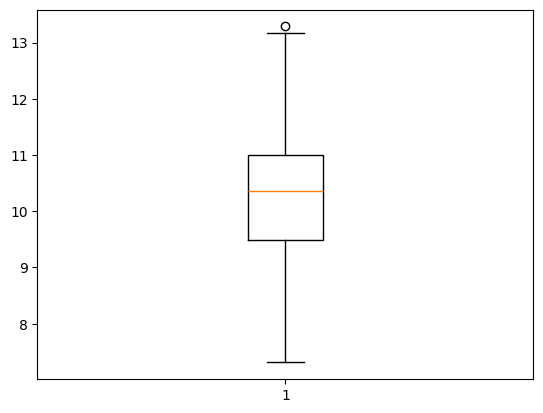

In [3]:
plt.boxplot(distances_w)
plt.show()

SIMULANDO COM PROBABILIDADE DE OLHAR PRA TECLA ERRADA

In [4]:
key_positions = prepare_key_positions()

data = get_last_n_gestures(db, collection_name, n=20)

generated_gestures = generated_n_gestures(data, key_positions, wrong_key_prob=0.2)

gesture_data, distances_w = plot_generated_and_real_gestures(generated_gestures, data, key_positions)

Wasserstein distance for word "block", 0: 8.057016167962157
Average Wasserstein distance for all words: 8.0570
Standard deviation of Wasserstein distances for all words: 0.0000
Wasserstein distance for word "teste", 1: 8.796987719993476
Average Wasserstein distance for all words: 8.4270
Standard deviation of Wasserstein distances for all words: 0.3700
Wasserstein distance for word "reputation", 2: 11.938051150042192
Average Wasserstein distance for all words: 9.5974
Standard deviation of Wasserstein distances for all words: 1.6825
Wasserstein distance for word "primeiro", 3: 11.052085115080851
Average Wasserstein distance for all words: 9.9610
Standard deviation of Wasserstein distances for all words: 1.5874
Wasserstein distance for word "clock", 4: 8.55266060557055
Average Wasserstein distance for all words: 9.6794
Standard deviation of Wasserstein distances for all words: 1.5275
Wasserstein distance for word "reputation", 5: 10.305205372752322
Average Wasserstein distance for all wor

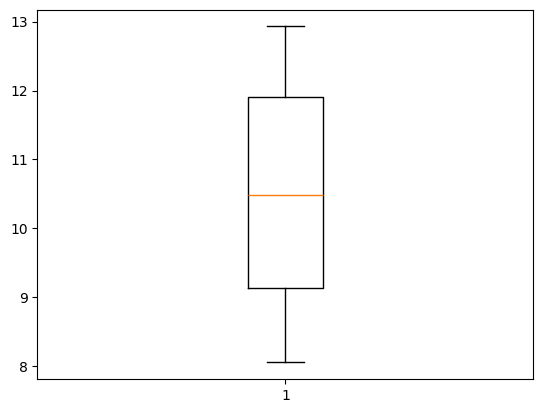

In [5]:
plt.boxplot(distances_w)
plt.show()

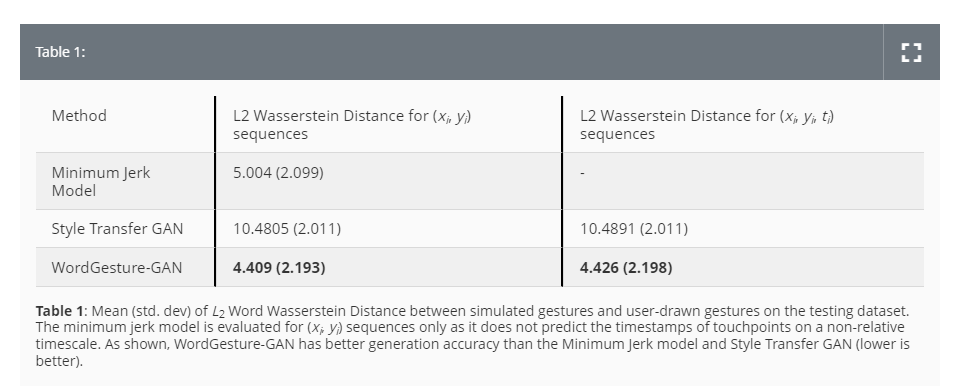

Bate o Style Transfer GAN -> baseline: 10.409(1.392)
